## Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

In [2]:
df_ = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2009-2010")

In [3]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(525461, 8)

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
# What is the number of unique products?
df["Description"].nunique()

4681

In [7]:
# How many of which products do you have?
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: Description, dtype: int64

In [8]:
# Which is the most ordered product?
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [9]:
# How many invoices have been issued?
df["Invoice"].nunique()

28816

In [10]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [11]:
df[df["Invoice"].str.contains("C", na=False)].shape

(10206, 8)

In [12]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [13]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [14]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [15]:
# What are the most expensive products)
df.sort_values("Price" , ascending= False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom,25111.09
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,10953.50
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom,10953.50
342147,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,NaN,United Kingdom,10468.80


In [16]:
# How many orders came from which country?
df["Country"].value_counts()

United Kingdom          477058
EIRE                      9460
Germany                   7661
France                    5532
Netherlands               2730
Spain                     1235
Switzerland               1170
Portugal                  1061
Belgium                   1038
Sweden                     887
Channel Islands            821
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Hong Kong                   74
Israel  

In [17]:
# How much income did countries generate?
df.groupby("Country").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head()

,TotalPrice
Country,
United Kingdom,8709203.673
EIRE,380977.820
Netherlands,268786.000
Germany,202395.321
France,147211.490


In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(407695, 9)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.586686,96.842229,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,1.25,1.95,3.75,10953.5
Customer ID,407695.0,15368.504107,1679.795700,12346.0,13997.00,15321.00,16812.00,18287.0
TotalPrice,407695.0,21.663261,77.147356,0.0,4.95,11.90,19.50,15818.4


In [21]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,407695.0,13.586686,96.842229,1.0,1.00,1.00,1.00,2.00,5.00,12.00,24.00,36.0,144.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,0.29,0.42,0.65,1.25,1.95,3.75,6.75,8.5,14.95,10953.5
Customer ID,407695.0,15368.504107,1679.795700,12346.0,12435.00,12731.00,13044.00,13997.00,15321.00,16812.00,17706.00,17913.0,18196.00,18287.0
TotalPrice,407695.0,21.663261,77.147356,0.0,0.65,1.25,2.10,4.95,11.90,19.50,35.70,67.5,201.60,15818.4


In [22]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [23]:
###############################################################
# Calculating RFM Metrics
###############################################################

# Recency, Frequency, Monetary


# Today's date - Last purchase

print(df["InvoiceDate"].max())


2010-12-09 20:01:00


In [24]:
# Calculating RFM Metrics

# Today's date - Last purchase

print(df["InvoiceDate"].max())

2010-12-09 20:01:00


In [25]:
today_date = dt.datetime(2010, 12, 11)
print(today_date)

2010-12-11 00:00:00


In [26]:
df["Tenure"] = df["InvoiceDate"]

In [27]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Tenure
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01 07:45:00


In [28]:
df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                               'Tenure': lambda date: (today_date - date.min()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()}).head()

,InvoiceDate,Tenure,Invoice,TotalPrice
Customer ID,,,,
12346.0,165,361,33,372.86
12347.0,3,40,71,1323.32
12348.0,74,74,20,222.16
12349.0,43,225,102,2671.14
12351.0,11,11,21,300.93


In [29]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Tenure': lambda date: (today_date - date.min()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.head ()

,InvoiceDate,Tenure,Invoice,TotalPrice
Customer ID,,,,
12346.0,165,361,11,372.86
12347.0,3,40,2,1323.32
12348.0,74,74,1,222.16
12349.0,43,225,3,2671.14
12351.0,11,11,1,300.93


In [30]:
rfm.columns

Index(['InvoiceDate', 'Tenure', 'Invoice', 'TotalPrice'], dtype='object')

In [31]:
rfm.columns = ['Recency', 'Tenure' , 'Frequency', 'Monetary']

rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)] # hatali satin almalar var.

rfm.head()

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12346.0,165,361,11,372.86
12347.0,3,40,2,1323.32
12348.0,74,74,1,222.16
12349.0,43,225,3,2671.14
12351.0,11,11,1,300.93


In [32]:
rfm["Tenure"].max()

374

In [33]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [34]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [35]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [36]:
rfm["Tenure"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [37]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,,
12346.0,165,2,11,372.86,2,5,2
12347.0,3,4,2,1323.32,5,2,4
12348.0,74,1,1,222.16,2,1,1
12349.0,43,5,3,2671.14,3,3,5
12351.0,11,2,1,300.93,5,1,2


In [39]:
# Calculating RFM Scores

rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [40]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,,
12346.0,165,2,11,372.86,2,5,2,252
12347.0,3,4,2,1323.32,5,2,4,524
12348.0,74,1,1,222.16,2,1,1,211
12349.0,43,5,3,2671.14,3,3,5,335
12351.0,11,2,1,300.93,5,1,2,512


In [41]:
rfm[rfm["RFM_SCORE"] == "555"].head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,,
12415.0,11,5,7,19543.84,5,5,5,555
12431.0,9,5,13,4370.52,5,5,5,555
12471.0,10,5,49,20139.74,5,5,5,555
12472.0,5,5,13,11308.48,5,5,5,555
12474.0,14,5,13,5048.66,5,5,5,555


In [42]:
rfm["RecencyScore"].value_counts()

5    906
1    855
4    853
3    850
2    848
Name: RecencyScore, dtype: int64

In [43]:
rfm["RFM_SCORE"].value_counts()

555    350
111    201
455    153
121    146
112    107
      ... 
515      1
315      1
452      1
352      1
351      1
Name: RFM_SCORE, Length: 117, dtype: int64

In [44]:
# Naming & Analysing RFM Segments

# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}



In [45]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12346.0,165,2,11,372.86,2,5,2,252,25
12347.0,3,4,2,1323.32,5,2,4,524,52
12348.0,74,1,1,222.16,2,1,1,211,21
12349.0,43,5,3,2671.14,3,3,5,335,33
12351.0,11,2,1,300.93,5,1,2,512,51


In [46]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
df[["Customer ID"]].nunique()

Customer ID    4314
dtype: int64

In [47]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12346.0,165,2,11,372.86,2,5,2,252,Cant_Loose
12347.0,3,4,2,1323.32,5,2,4,524,Potential_Loyalists
12348.0,74,1,1,222.16,2,1,1,211,Hibernating
12349.0,43,5,3,2671.14,3,3,5,335,Need_Attention
12351.0,11,2,1,300.93,5,1,2,512,New_Customers


In [48]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
About_to_Sleep        53.819242   343   1.201166   343   441.320000   343
At_Risk              152.158756   611   3.073650   611  1188.878316   611
Cant_Loose           124.116883    77   9.116883    77  4099.450000    77
Champions              7.119155   663  12.553544   663  6852.264167   663
Hibernating          213.885714  1015   1.126108  1015   403.977836  1015
Loyal_Customers       36.287062   742   6.830189   742  2746.067353   742
Need_Attention        53.265700   207   2.449275   207  1060.357005   207
New_Customers          8.580000    50   1.000000    50   386.199200    50
Potential_Loyalists   18.793037   517   2.017408   517   729.510986   517
Promising             25.747126    87   1.000000    87   367.086782    87

In [49]:
rfm[rfm["Segment"] == "Need_Attention"].head()


,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12349.0,43,5,3,2671.14,3,3,5,335,Need_Attention
12369.0,49,4,3,1791.15,3,3,4,334,Need_Attention
12371.0,45,5,3,2179.42,3,3,5,335,Need_Attention
12374.0,57,5,3,2246.29,3,3,5,335,Need_Attention
12389.0,38,4,3,1433.33,3,3,4,334,Need_Attention


In [50]:
rfm["Basket_Size"] = rfm ["Monetary"] /  rfm ["Frequency"]

In [51]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Basket_Size
Customer ID,,,,,,,,,,
12346.0,165,2,11,372.86,2,5,2,252,Cant_Loose,33.896364
12347.0,3,4,2,1323.32,5,2,4,524,Potential_Loyalists,661.660000
12348.0,74,1,1,222.16,2,1,1,211,Hibernating,222.160000
12349.0,43,5,3,2671.14,3,3,5,335,Need_Attention,890.380000
12351.0,11,2,1,300.93,5,1,2,512,New_Customers,300.930000


 ## CLUSTER

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [53]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Basket_Size
Customer ID,,,,,,,,,,
12346.0,165,2,11,372.86,2,5,2,252,Cant_Loose,33.896364
12347.0,3,4,2,1323.32,5,2,4,524,Potential_Loyalists,661.660000
12348.0,74,1,1,222.16,2,1,1,211,Hibernating,222.160000
12349.0,43,5,3,2671.14,3,3,5,335,Need_Attention,890.380000
12351.0,11,2,1,300.93,5,1,2,512,New_Customers,300.930000


In [54]:
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore"]]

In [55]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,
12346.0,2,5,2
12347.0,5,2,4
12348.0,2,1,1
12349.0,3,3,5
12351.0,5,1,2


In [56]:

#  Optimal Number of Clusters

kmeans = KMeans()
ssd = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    ssd.append(kmeans.inertia_)


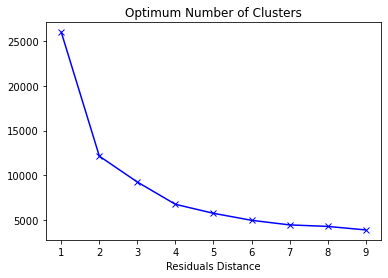

In [57]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()

In [58]:
plt.show()

# Final Clusters

kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data.loc[:, "clusters"] = kmeans.labels_

/var/folders/jr/dhqrm51x5xb1bm5fcwng1sj80000gn/T/ipykernel_55996/4233263500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data.loc[:, "clusters"] = kmeans.labels_


In [59]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,
12346.0,2,5,2,2.0
12347.0,5,2,4,1.0
12348.0,2,1,1,0.0
12349.0,3,3,5,2.0
12351.0,5,1,2,3.0


In [60]:
segment_data["clusters"].value_counts()

0.0    1120
2.0     974
4.0     813
3.0     771
1.0     634
Name: clusters, dtype: int64

In [61]:
kmeans = KMeans(n_clusters=7).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

segment_data["clusters"].value_counts()


/var/folders/jr/dhqrm51x5xb1bm5fcwng1sj80000gn/T/ipykernel_55996/500206742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data["clusters"] = kmeans.labels_


0    977
1    813
2    771
3    634
6    544
5    424
4    149
Name: clusters, dtype: int64

In [62]:

kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

segment_data["clusters"].value_counts()

/var/folders/jr/dhqrm51x5xb1bm5fcwng1sj80000gn/T/ipykernel_55996/1862301408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data["clusters"] = kmeans.labels_


0    1117
1     977
2     813
4     771
3     634
Name: clusters, dtype: int64

In [63]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Basket_Size
Customer ID,,,,,,,,,,
12346.0,165,2,11,372.86,2,5,2,252,Cant_Loose,33.896364
12347.0,3,4,2,1323.32,5,2,4,524,Potential_Loyalists,661.660000
12348.0,74,1,1,222.16,2,1,1,211,Hibernating,222.160000
12349.0,43,5,3,2671.14,3,3,5,335,Need_Attention,890.380000
12351.0,11,2,1,300.93,5,1,2,512,New_Customers,300.930000


In [64]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,
12346.0,2,5,2,0
12347.0,5,2,4,3
12348.0,2,1,1,1
12349.0,3,3,5,0
12351.0,5,1,2,4


In [65]:
# RFM & K-Means Joining..

segmentation = rfm[["Segment"]].merge(segment_data, on="Customer ID")

In [66]:
segmentation.head()

,Segment,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,,
12346.0,Cant_Loose,2,5,2,0
12347.0,Potential_Loyalists,5,2,4,3
12348.0,Hibernating,2,1,1,1
12349.0,Need_Attention,3,3,5,0
12351.0,New_Customers,5,1,2,4


In [67]:
segmentation.dtypes

Segment             object
RecencyScore      category
FrequencyScore    category
MonetaryScore     category
clusters             int32
dtype: object

In [68]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters,0,1,2,3,4
Segment,,,,,
About_to_Sleep,17,0,0,0,326
At_Risk,467,144,0,0,0
Cant_Loose,77,0,0,0,0
Champions,0,0,480,183,0
Hibernating,182,833,0,0,0
Loyal_Customers,225,0,333,184,0
Need_Attention,149,0,0,0,58
New_Customers,0,0,0,3,47
Potential_Loyalists,0,0,0,263,254


In [69]:
segmentation.groupby("Segment").agg({"clusters": "count"}).head()

,clusters
Segment,
About_to_Sleep,343
At_Risk,611
Cant_Loose,77
Champions,663
Hibernating,1015


In [70]:
segmentation["RecencyScore"] = segmentation["RecencyScore"].astype(int)
segmentation["FrequencyScore"] = segmentation["FrequencyScore"].astype(int)
segmentation["MonetaryScore"] = segmentation["MonetaryScore"].astype(int)

In [71]:
segmentation.groupby("clusters").agg({"RecencyScore":["count","median"],
                                      "FrequencyScore":["median"],
                                      "MonetaryScore":["median","sum"]})

RecencyScore        FrequencyScore MonetaryScore      
                count median         median        median   sum
clusters                                                       
0                1117    2.0            3.0           4.0  4088
1                 977    1.0            2.0           1.0  1393
2                 813    5.0            5.0           5.0  3915
3                 634    5.0            4.0           3.0  2148
4                 771    4.0            2.0           2.0  1392